# <font color='blue'>Project Heart - CCPS 844 Data Mining</font>

### Table of Contents
* [Introduction](#intro)
* [Data Selection and Readings](#import)
* [Data Visualization](#visual)
* [Exploratory Data Analysis (EDA)](#eda)
* [Feature Selection](#feats)
* [Dimentionality Reduction](#reduction)
* [Classification Algorithms](#ca)
* [Regression Algorithms](#ra)
* [Conclusion](#conclusion)

## Introduction <a id="intro"></a>

### Problem we are trying to solve

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

The data sample we have taken from Kaggle showcases information of various health indicators of individuals and here we are predicting the likelyhood of heart failure. We will create models to predict and classify whether a person is at risk of a heart failure based on the feature provided in the dataset.

**The dataset contains the following columns:**
* Age: Age of the individual.
* Sex: Gender of the individual (M for Male, F for Female).
* ChestPainType: Type of chest pain (ATA, NAP, ASY, TA).
* RestingBP: Resting blood pressure (in mm Hg).
* Cholesterol: Serum cholesterol (in mg/dl).
* FastingBS: Fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false).
* RestingECG: Resting electrocardiographic results (Normal, ST, LVH).
* MaxHR: Maximum heart rate achieved.
* ExerciseAngina: Exercise-induced angina (Y = Yes, N = No).
* Oldpeak: ST depression induced by exercise relative to rest.
* ST_Slope: The slope of the peak exercise ST segment (Up, Flat, Down).
* HeartDisease: The target variable (1 = heart disease, 0 = no heart disease).

## Data Selection and Readings <a id="import"></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [2]:
# Loading dataset into pandas
hearts = pd.read_csv('heart.csv')
hearts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


* About half of the data types are objects, so adjustments are needed to solve the problem we are trying to address.

The first few rows of the Dataset Hearts is displayed below

In [3]:
hearts.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
hearts.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


A bit more information on the summary above:
* **Age**:
    * Age is a major factor in predicting heart failure because older people are usually at a higher risk.
* **RestingBP** (Resting Blood Pressure):
    * High blood pressure is a well-known risk factor for heart disease.
    * There are some values of 0, which might affect the results, so we need to clean the data.
* **Cholesterol**:
    * High cholesterol levels are linked to a higher risk of heart disease.
    * The dataset has a wide range of values, showing that there's a lot of variability among individuals.
* **FastingBS** (Fasting Blood Sugar > 120 mg/dL):
    * High fasting blood sugar levels can indicate diabetes, which is a risk factor for heart disease. This binary feature can help in classification models.
* **MaxHR** (Maximum Heart Rate Achieved):
    * A lower maximum heart rate during exercise can show poorer cardiovascular fitness, which can predict heart disease.
* **Oldpeak**:
    * There are negative values that needs to be investigated.
* **HeartDisease**:
    * This is the target variable, with 0 indicating no heart disease and 1 indicating the presence of heart disease.

In [5]:
hearts.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
hearts.shape

(918, 12)

* The dataset contains 918 entries and 12 columns with no missing values. This gives us confidence that we have a complete dataset to work with. The data types of the columns vary, with some being integers, some floats, and others categorical.

In [7]:
hearts.groupby('HeartDisease').size()

HeartDisease
0    410
1    508
dtype: int64

## Data Visualization <a id="visual"></a>

In [8]:
# Note to be carefull with using 'warning'. Will remove when needed.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

* I tried converting 'inf' values to 'NaN' as the warning suggested but it was still giving the same warning. So I opted with importing 'warnings.'

#### Histogram
* Looking at the raw data, the features `Age`, `RestingBP`, `Cholesterol`, `MaxHR`, and `Oldpeak` are numerical features that can help better understand the distributions.

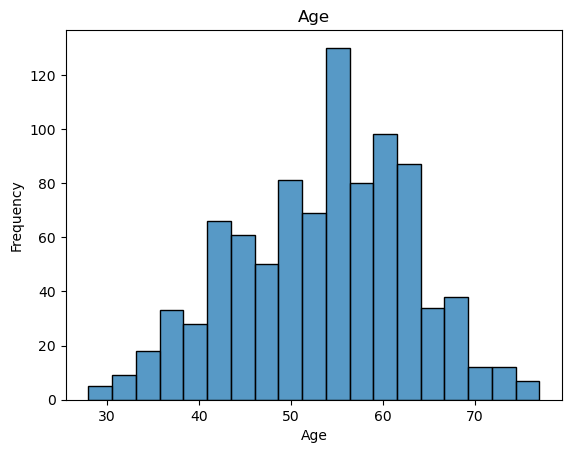

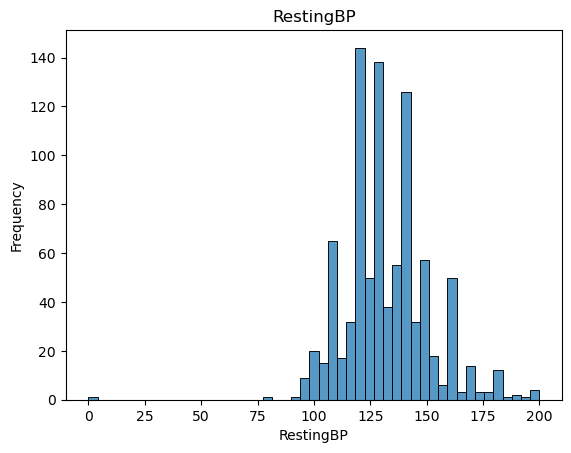

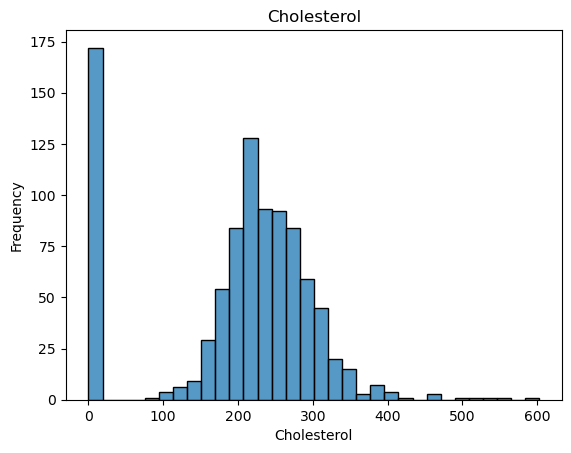

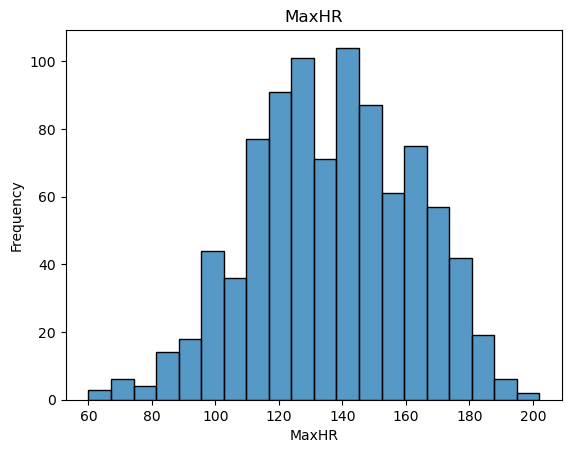

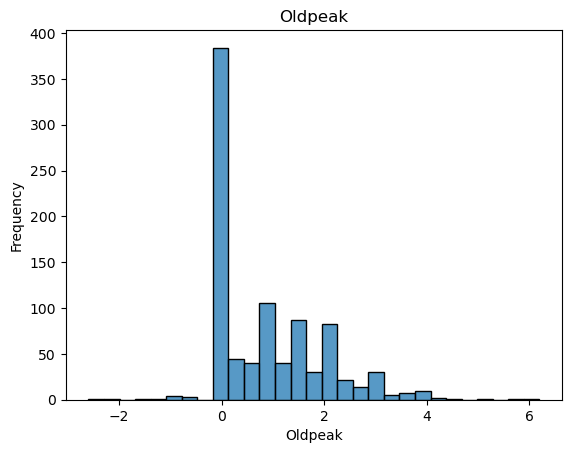

In [9]:
key_num_feats = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create histograms
for col in key_num_feats:
    plt.figure()
    sns.histplot(hearts[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Observation:**

* `Age` is uniformly distributed, with most individuals between 40 and 60 years old.
* `RestingBP` and `Cholestero`l show some outliers, specifically 0, so data cleaning is needed.
* `MaxHR` peaks around 120-140 bpm, and `Oldpeak` shows a left skew, indicating most individuals have low ST depression values.

#### Box Plot

The box plot below visualizes the distribution of Maximum Heart Rate (MaxHR) based on the presence or absence of heart disease. 

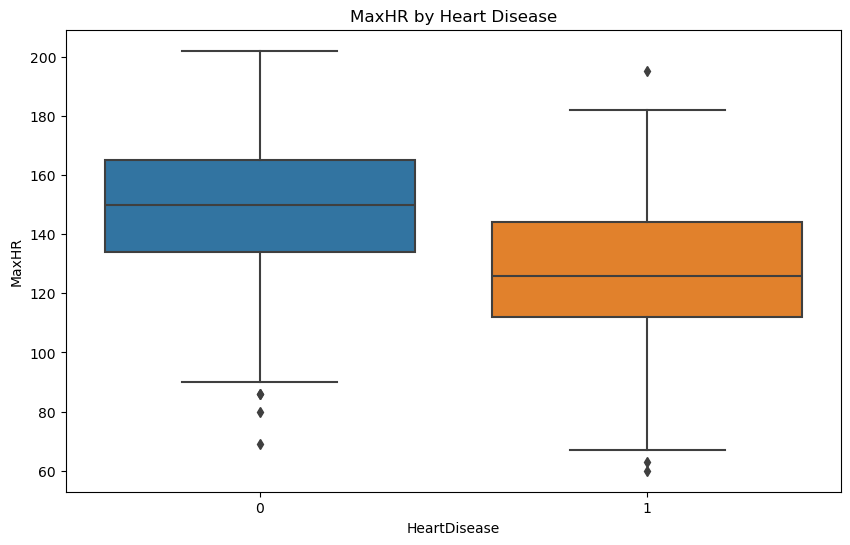

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='MaxHR', data=hearts)
plt.title('MaxHR by Heart Disease')
plt.show()

* Individuals with HeartDisease=0 (no heart disease) tend to have a higher maximum heart rate (MaxHR) compared to those with HeartDisease=1 (heart disease).
* The outliers show that there are some differences in heart rate responses within both groups.

#### Count Plot

Converting the datatypes of feature 'HeartDisease' to a string type so that the comparison works.

In [11]:
hearts['HeartDisease'] = hearts['HeartDisease'].astype(str)

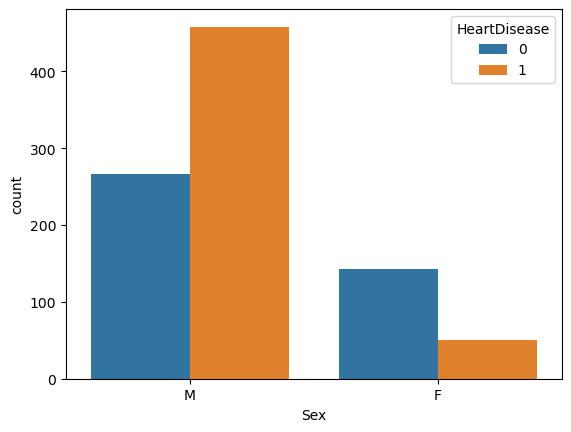

In [12]:
# Create the count plot
sns.countplot(x='Sex', hue='HeartDisease', data=hearts)
plt.show()

* Based on the above countplot for feature `Sex`, males are more likely to be at risk of heart failure (HeartDisease = 1) than females.

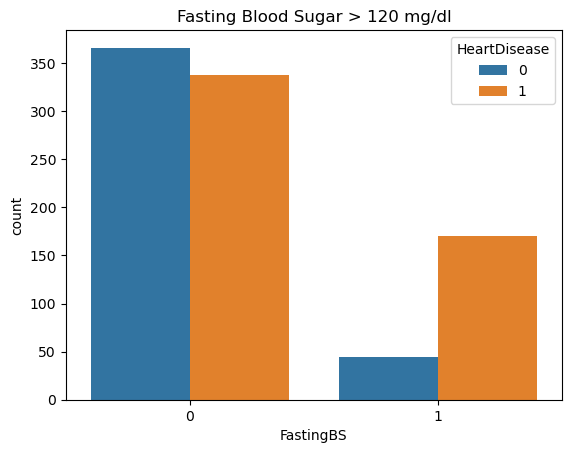

In [13]:
# Create the count plot
sns.countplot(x='FastingBS', hue='HeartDisease', data=hearts)
plt.title('Fasting Blood Sugar > 120 mg/dl')
plt.show()

* The count plot shows that for fasting blood sugar levels greater than 120 mg/dl (FastingBS = 1), there are more individuals with heart disease (HeartDisease = 1) compared to those without heart disease (HeartDisease = 0). 

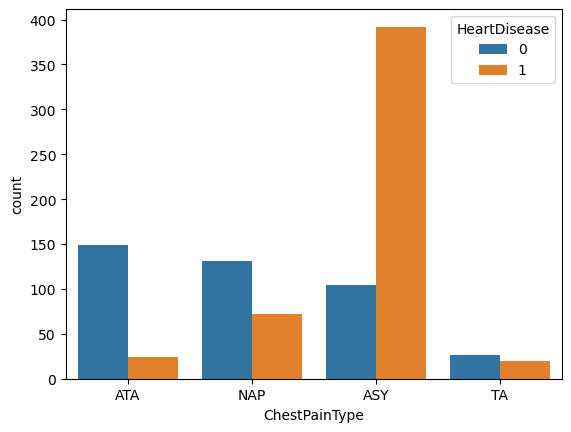

In [14]:
# Create the count plot
sns.countplot(x='ChestPainType', hue='HeartDisease', data=hearts)
plt.show()

* Individuals with asymptomatic chest pain (ASY) are more likely to have heart disease (HeartDisease = 1), even if they don't feel anything.
* This means it’s really important to check for heart disease even if someone doesn’t have noticeable symptoms because they could still be at risk.

Counting the occurrences of each pain category in ChestPainType

In [15]:
chest_pain_counts = hearts['ChestPainType'].value_counts()

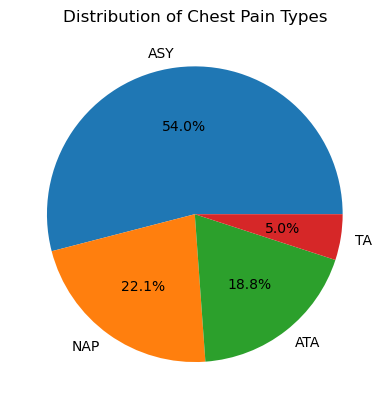

In [16]:
# Create a pie chart
chest_pain_counts.plot.pie(autopct='%1.1f%%')
plt.ylabel('') 
plt.title('Distribution of Chest Pain Types')
plt.show()

**Observation:**

* Males are more affected and have higher chances of developing heart disease compared to females.
* Individuals with Asymptomatic (ASY) chest pain and a Fasting Blood Sugar (FastingBS) of 1 have higher chances of heart disease. Based on the pie chart, about 58% of these individuals in this dataset experience ASY.

#### Correlation Heatmap

Displaying the first few rows again to get a quick overview of the dataset structure and the values in each column.

In [17]:
hearts.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Reset data types for `FastingBS` and `HeartDisease` to integers

In [18]:
hearts['FastingBS'] = hearts['FastingBS'].astype(int)
hearts['HeartDisease'] = hearts['HeartDisease'].astype(int)

Encodeing the categorical features into a series of binary columns. This process involves creating dummy variables for each category within the features. 

In [19]:
cat_feats = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
final_heart = pd.get_dummies(hearts, columns=cat_feats, drop_first=True)

final_heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [20]:
final_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(1), in

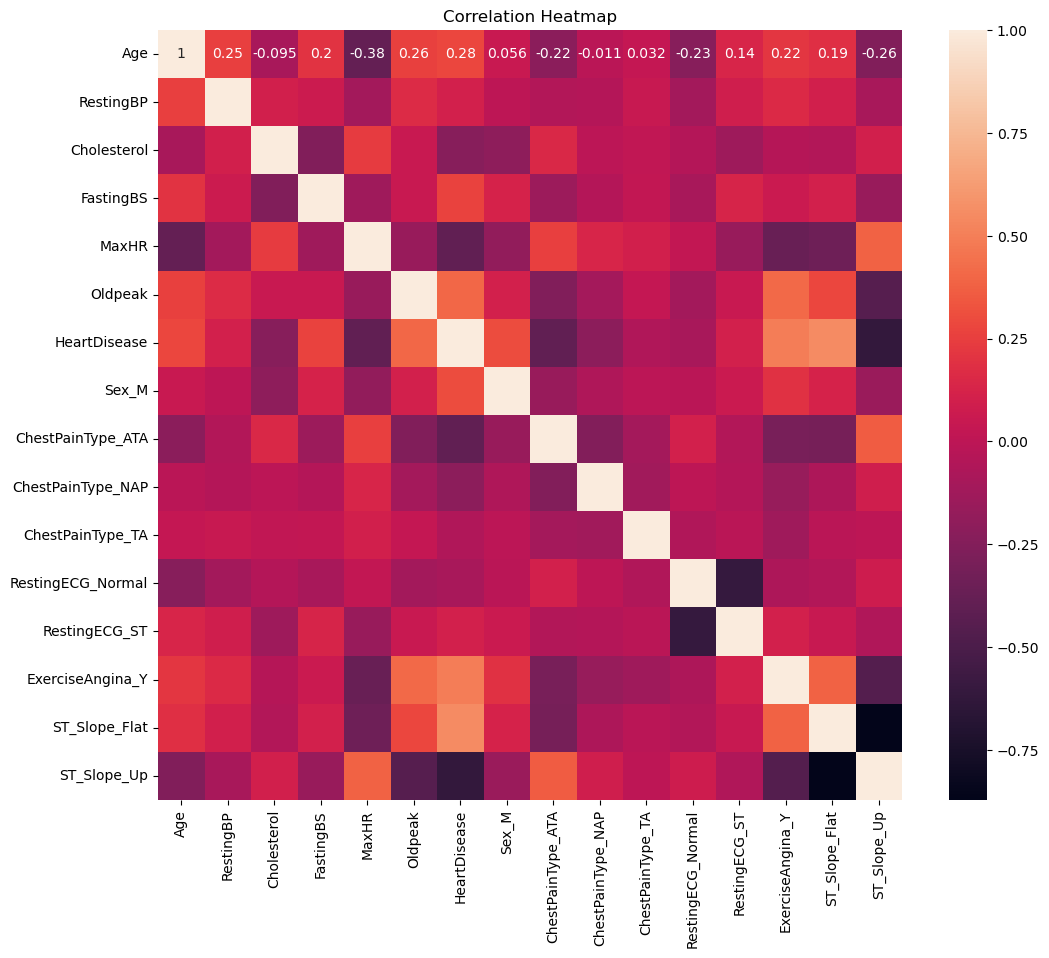

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(final_heart.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

**Observation:**
* Observed strong correlations:
  * Positive: `Oldpeak` and `ExerciseAngina_Y`.
  * Negative: `ST_Slope_Up` and `MaxHR`.
  * Moderate correlations noted for `ChestPainType` and ECG features.

## Exploratory Data Analysis <a id="eda"></a>

Here is a summary of the `final_heart` DataFrame, including the data types, non-null counts, and memory usage of each column.

In [22]:
final_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(1), in

#### Jointplot

Visualizing the relationship between `Age` and `Cholesterol`.

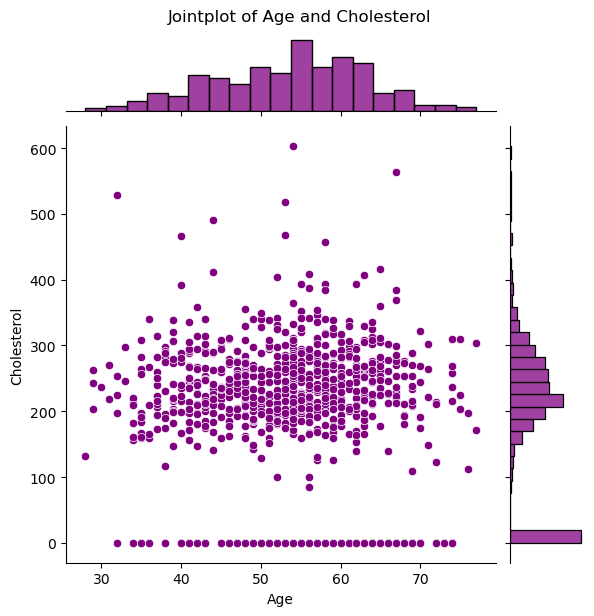

In [23]:
sns.jointplot(x='Age', y='Cholesterol', data=hearts, color='purple')
plt.suptitle('Jointplot of Age and Cholesterol', y=1.02)
plt.show()

* `Age` and `Cholesterol` indicates a positive relationship between these two variables. Higher cholesterol levels are associated with older age, and this trend appears consistent across the dataset.
* The scatter plot also shows a range of cholesterol levels for individuals of different ages, with a general upward trend in cholesterol as age increases.

#### KMeans Clustering

Using K-Means clustering on the heart disease dataset, but only looking at `Age` and `Cholesterol` for now. This helps us find different groups or clusters in the data based on these two features.

In [24]:
from sklearn.cluster import KMeans

# Selecting features for clustering
dataClusters1 = [hearts[['Age', 'Cholesterol']].values, hearts['HeartDisease'].values]

# Create KMeans instance
kmeansModel = KMeans(n_clusters=3, n_init=10) # played around with n_cluster value to change result

# Fit the model to the data
kmeansModel.fit(dataClusters1[0])

KMeans(n_clusters=3, n_init=10)

In [25]:
centers = kmeansModel.cluster_centers_  # Retrieves the coordinates of the center points
labels = kmeansModel.labels_ # Retrieves the cluster labels assigned to each data point in the dataset. 

The plot below displays the results of clustering using K-Means and compares them to the actual clusters. 
Both plots use `Age` on the x-axis and `Cholesterol` on the y-axis for comparison.

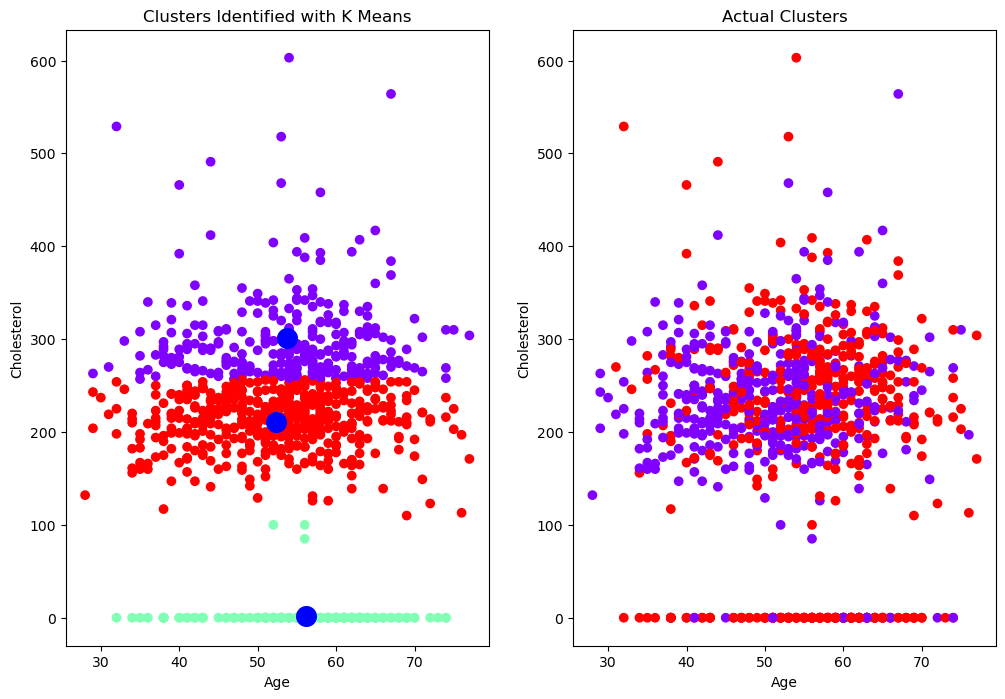

In [26]:
plt.figure(figsize=(12, 8))

# First subplot for KMeans clusters
plt.subplot(1, 2, 1)
plt.scatter(dataClusters1[0][:, 0], dataClusters1[0][:, 1], c=labels, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, marker='o')
plt.title('Clusters Identified with K Means')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

# Second subplot for actual clusters
plt.subplot(1, 2, 2)
plt.scatter(dataClusters1[0][:, 0], dataClusters1[0][:, 1], c=dataClusters1[1], cmap='rainbow')
plt.title('Actual Clusters')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

plt.show()

* There is some overlap between the red and purple clusters in both the K-means identified clusters and the actual clusters. This suggests that the distinction between moderate and high cholesterol levels isn't very clear. 

In [27]:
# Selecting features for clustering
dataClusters2 = [hearts[['RestingBP', 'MaxHR']].values, hearts['HeartDisease'].values]

# Create KMeans instance
kmeansModel = KMeans(n_clusters=2, n_init=10) # played around with n_cluster value to change result

# Fit the model to the data
kmeansModel.fit(dataClusters2[0])

KMeans(n_clusters=2, n_init=10)

In [28]:
centers = kmeansModel.cluster_centers_
labels = kmeansModel.labels_

The plot below displays the results of clustering using K-Means and compares them to the actual clusters. 
Both plots use `MaxHRs` on the x-axis and `Cholesterol` on the y-axis for comparison.

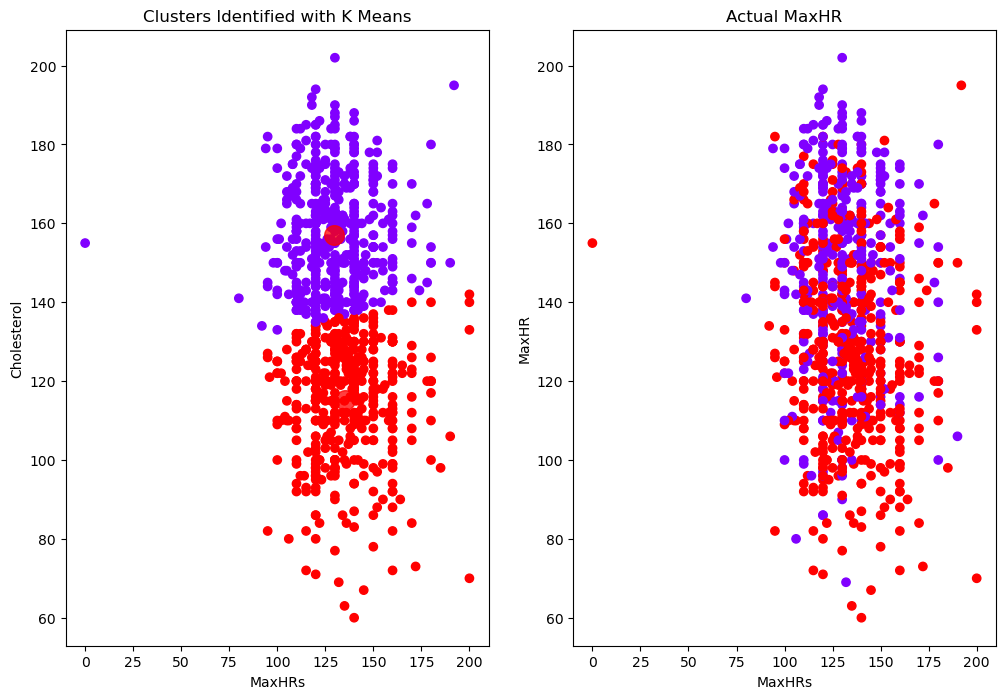

In [29]:
plt.figure(figsize=(12, 8))

# First subplot for KMeans clusters
plt.subplot(1, 2, 1)
plt.scatter(dataClusters2[0][:, 0], dataClusters2[0][:, 1], c=labels, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='o')
plt.title('Clusters Identified with K Means')
plt.xlabel('MaxHRs')
plt.ylabel('Cholesterol')

# Second subplot for actual clusters
plt.subplot(1, 2, 2)
plt.scatter(dataClusters2[0][:, 0], dataClusters2[0][:, 1], c=dataClusters2[1], cmap='rainbow')
plt.title('Actual MaxHR')
plt.xlabel('MaxHRs')
plt.ylabel('MaxHR')

plt.show()

* The red cluster (high cholesterol) and the purple cluster (low cholesterol) show some overlap. This suggests that K-means might not be perfectly accurate in differentiating these clusters based on cholesterol levels alone.

**Note for both clusters** - To improve clustering performance, we might need to include additional features or improve the ones we already have.

## Feature Selection <a id="feats"></a>

We are performing feature selection using Recursive Feature Elimination with Cross-Validation (RFECV) to identify the most relevant features for a Random Forest Classifier.

In [30]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

In [31]:
X = final_heart.drop(columns=['HeartDisease'])
y = final_heart['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initializing classifier 
rfc = RandomForestClassifier()

Create an RFECV object with the random forest classifier as the estimator. step=1 indicates that we eliminate one feature at a time. We use 10-fold stratified cross-validation and accuracy as the scoring metric. The fit method performs the feature selection.

In [33]:
# Apply RFECV
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train, y_train)
# Optimal number of features
print(f"Optimal number of features : {rfecv.n_features_}")

Optimal number of features : 14


In [34]:
# Selected features
selected_feat = final_heart.drop(columns=['HeartDisease']).columns[rfecv.support_]
print(f"Selected Features: {selected_feat}")

Selected Features: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [35]:
print(rfecv.cv_results_['mean_test_score'])

[0.58978156 0.70170307 0.80647908 0.81749352 0.82410218 0.82275083
 0.8268234  0.84315068 0.85       0.85546094 0.85955202 0.86090337
 0.87182525 0.8731766  0.86914106]


Plot the number of features vs. cross-validation scores

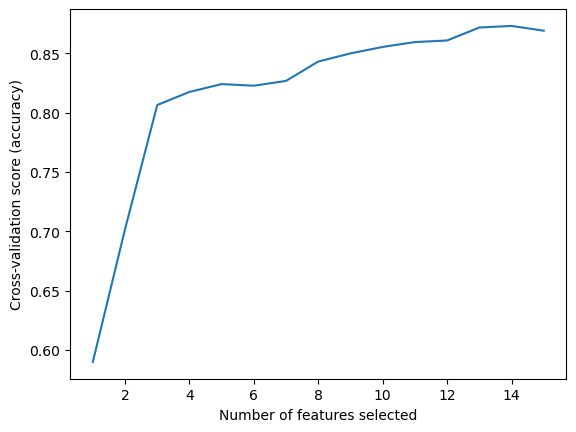

In [36]:
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score (accuracy)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [37]:
rfecv.n_features_

14

In [38]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

In [39]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1])

**Observation:**
* Optimal Number of Features: 14
* Selected Features: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, Sex_M, ChestPainType_ATA, ChestPainType_NAP, RestingECG_Normal, RestingECG_ST, ExerciseAngina_Y, ST_Slope_Flat, ST_Slope_Up
* Cross-Validation Scores: Accuracy improved as we added more features. With 14 features, the accuracy reached 0.872.
* Feature Ranking: Most features were ranked 1, but RestingECG_Normal was ranked 2.

## Dimensionality Reduction <a id="reduction"></a>

In [40]:
from sklearn.decomposition import PCA
from sklearn import decomposition

Selecting optimal features based on RFECV

In [41]:
X_optimal = X_train.loc[:, rfecv.support_]

In [42]:
X_optimal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 795 to 102
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                734 non-null    int64  
 1   RestingBP          734 non-null    int64  
 2   Cholesterol        734 non-null    int64  
 3   FastingBS          734 non-null    int64  
 4   MaxHR              734 non-null    int64  
 5   Oldpeak            734 non-null    float64
 6   Sex_M              734 non-null    bool   
 7   ChestPainType_ATA  734 non-null    bool   
 8   ChestPainType_NAP  734 non-null    bool   
 9   RestingECG_Normal  734 non-null    bool   
 10  RestingECG_ST      734 non-null    bool   
 11  ExerciseAngina_Y   734 non-null    bool   
 12  ST_Slope_Flat      734 non-null    bool   
 13  ST_Slope_Up        734 non-null    bool   
dtypes: bool(8), float64(1), int64(5)
memory usage: 45.9 KB


In [43]:
X_optimal.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.651226,133.064033,199.683924,0.227520,136.178474,0.905041
std,9.364290,18.438941,108.216855,0.419517,25.329254,1.082952
min,29.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,177.000000,0.000000,118.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,269.000000,0.000000,155.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


Initializing PCA to reduce the number of dimensions to 3 components.

In [44]:
pca = decomposition.PCA(n_components=3)
pca.fit(X_optimal)
X_optimal_pca = pca.transform(X_optimal)

In [45]:
# Output the shape of the dataset before and after PCA
print("Dimension of the original dataset:", X_optimal.shape)
print("Dimension of the dataset after PCA:", X_optimal_pca.shape)

Dimension of the original dataset: (734, 14)
Dimension of the dataset after PCA: (734, 3)


We observed the original dataset going on (734, 14) to (734, 3) after applying the PCA

Here is a 3D scatter plot of the PCA results to visualize the data distribution based on the first three principal components.

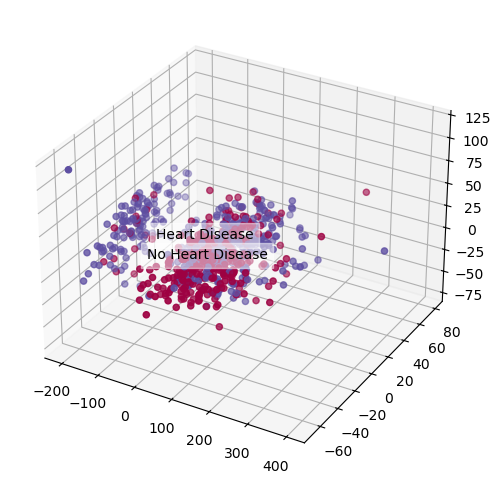

In [46]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for name, label in [('No Heart Disease', 0), ('Heart Disease', 1)]:
    ax.text3D(X_optimal_pca[y_train == label, 0].mean(),
              X_optimal_pca[y_train == label, 1].mean(),
              X_optimal_pca[y_train == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

y = np.choose(y_train, [0, 1]).astype(float)
ax.scatter(X_optimal_pca[:, 0], X_optimal_pca[:, 1], X_optimal_pca[:, 2], c=y, cmap="Spectral")

plt.show()

Fitting PCA with 15 components to examine how much variance each principal component explains.

In [47]:
pca_Object = PCA(n_components=15)
pca_Object.fit(X_train)

PCA(n_components=15)

In [48]:
var_Data = pca_Object.explained_variance_ratio_
var1_Data = np.cumsum(np.round(pca_Object.explained_variance_ratio_, decimals=4)*100)

var1_Data

array([91.96, 96.93, 99.45, 99.98, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99])

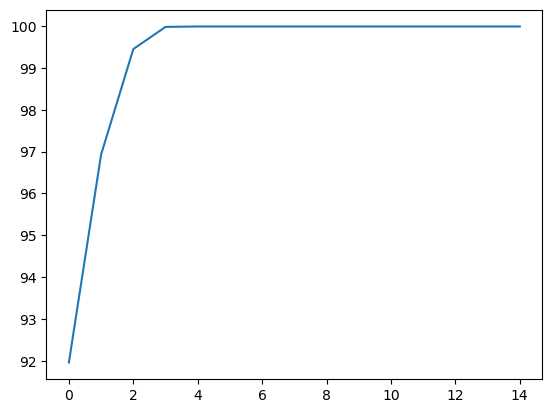

In [49]:
plt.plot(var1_Data)
plt.show()

In [50]:
pca_object = decomposition.PCA(n_components=11)
pca_object.fit(X_optimal)
obj = pca_object.transform(X_optimal)
print("obj shape: ",obj.shape)
obj

obj shape:  (734, 11)


array([[ 4.37196798e+01, -5.79559542e+01, -1.44046088e+00, ...,
        -4.84987339e-01,  9.99459821e-01,  1.65400477e-01],
       [ 1.19826864e+01, -4.29671656e+01, -6.74884169e+00, ...,
        -5.01666567e-01,  8.99640904e-02, -1.59098602e-01],
       [ 1.27902527e+01,  1.62015493e+01, -1.28906388e+01, ...,
        -4.06925941e-01,  4.64498702e-01,  4.14664139e-01],
       ...,
       [ 5.35921308e+01, -4.11445569e+00,  1.57832044e+00, ...,
        -7.69276768e-01, -4.38348914e-01,  1.97287789e-01],
       [-2.00224653e+02,  1.19921193e+01, -1.91981382e+01, ...,
        -5.26262973e-01, -8.20734832e-01,  1.21697539e-01],
       [ 1.91890842e+02,  1.88280231e+01, -7.66749045e+00, ...,
         9.22654125e-01,  2.75239611e-01,  1.59070243e-01]])

**Obervation:**
* Initial Dataset: We started with 734 samples and 14 features, which included both numbers and categories.
* PCA to 3 Components: We reduced the dataset from 14 dimensions to 3. The 3D scatter plot helped us see how well the data points for Heart Disease and No Heart Disease are separated.
* Explained Variance: When we used 15 PCA components, we were able to explain 99.99% of the variance in the data.
* PCA to 11 Components: We also tried reducing to 11 components, which kept most of the important variance while lowering the number of dimensions.

## Classification Algorithms <a id="ca"></a>

**Question** Can we predict the heart disease status of an individual geiven their health measurement?

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree

In [52]:
print(hearts.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


Training Decision Tree classifier

In [53]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Predict and Evaluate Decision Tree Model

In [54]:
y_pred = clf.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [55]:
accuracy_score(y_test, y_pred)

0.8260869565217391

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



Confusion Matrix for Decision Tree.

In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62 15]
 [17 90]]


* The confusion matrix shows that the model has a relatively balanced performance, with some false positives and false negatives.

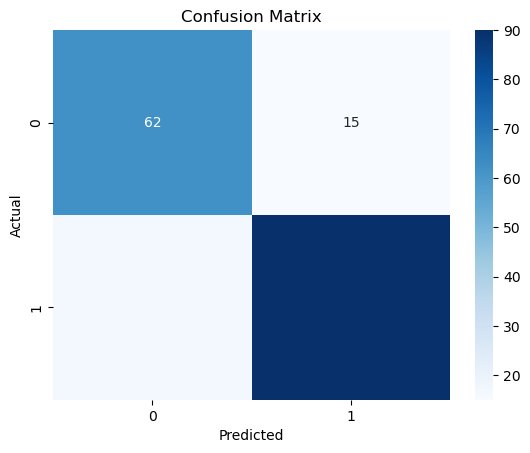

In [58]:
# Heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Decision Tree

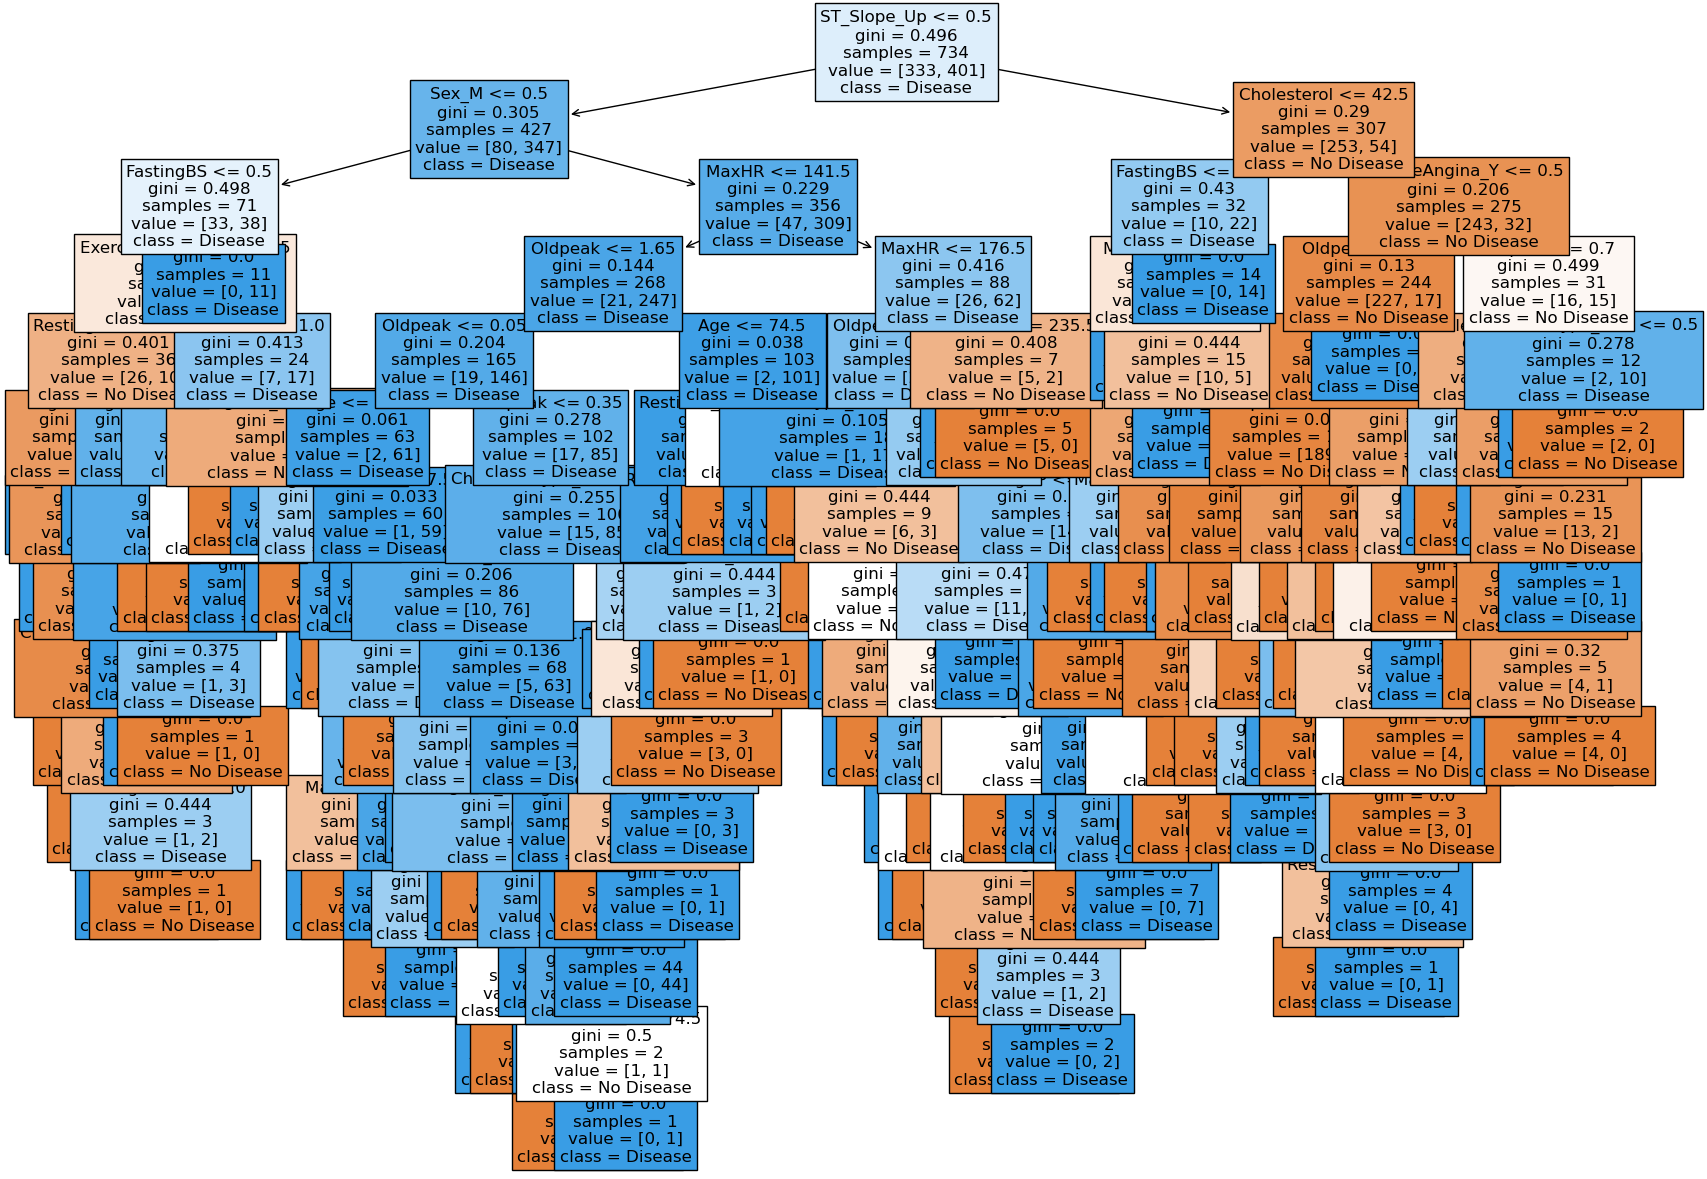

In [59]:
plt.figure(figsize=(20, 15))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, fontsize=12)
plt.show()

Initialize and train K-Nearest Neighbors

In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
y_pred_knn = knn.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred_knn)

0.7065217391304348

In [63]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        77
           1       0.77      0.70      0.74       107

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.71      0.71      0.71       184



Confusion Matrix for KNN

In [64]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[55 22]
 [32 75]]


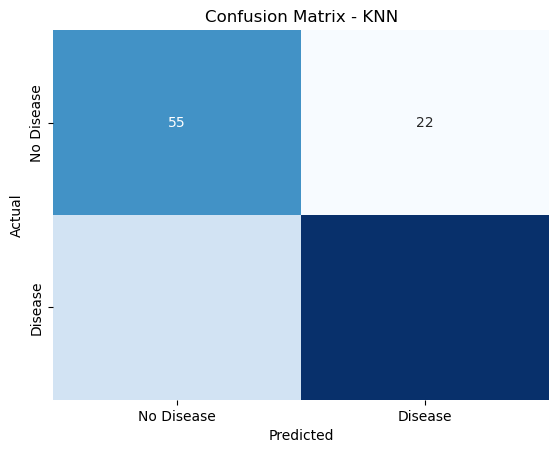

In [65]:
# Heatmap
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - KNN')
plt.show()

**Observation:**
* Decision Tree Classifier:
    * Accuracy: 82.6%
    * Performance: Higher precision and recall, especially for detecting disease.
* K-Nearest Neighbors (KNN):
    * Accuracy: 70.7%
    * Performance: Lower precision and recall, more false positives/negatives.

## Regression Algorithms <a id="ra"></a>

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

Training Linear Regression model

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Evaluating the regression model

In [68]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.25513186042185115
Mean Squared Error: 0.11436703629232896
Root Mean Squared Error: 0.3381819573725496


* On average, the model's predictions miss the actual values by about 0.255 units.
* The average of the squared differences between the predictions and actual values is 0.114, with bigger errors affecting this number more.
* The average error in predictions is about 0.338 units, showing how much the predictions usually deviate from the real values.

In [69]:
# Feature selection for regression
important_features = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']  # Update with important feature names
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

Retraining the model with selected features --> 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'

In [70]:
model.fit(X_train_reduced, y_train)
y_pred_reduced = model.predict(X_test_reduced)

Evaluate the model with selected features

In [71]:
rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))
print(f'RMSE with reduced features: {rmse_reduced}')

RMSE with reduced features: 0.4430601787414065


The RMSE is 0.443 with reduced features, which means that, on average, the predictions are off by about 0.443 units with these selected features. This is higher than the RMSE when using all the features, suggesting that having fewer features might not work as well.

#### Pairplot

By creating a copy, it endures that any modifcation made does not alter the orginial dataframe

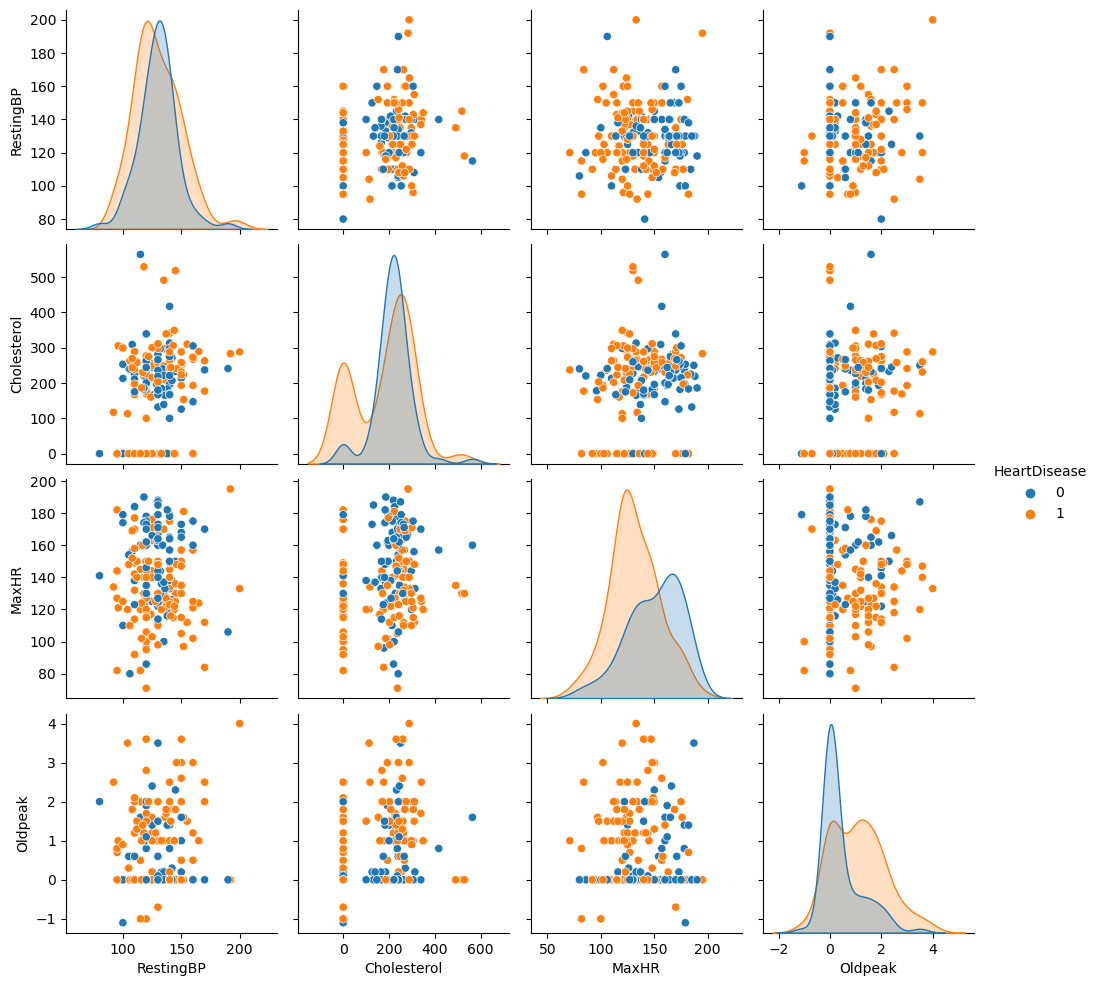

In [72]:
X_test_reduced_copy = X_test_reduced.copy()  # copy of X_test_reduced
X_test_reduced_copy['HeartDisease'] = y_test.values

sns.pairplot(X_test_reduced_copy, hue='HeartDisease')
plt.show()

**Observation:**

* `RestingBP` and `Cholesterol`: Significant overlap between groups suggests these features are less predictive on their own.
* `MaxHR`: When looking at the data, it's clear that individuals who do not have heart disease tend to have higher maximum heart rates (MaxHR) compared to those who do have heart disease.
* `Oldpeak`: Higher values of Oldpeak, which measures the depression in the ST segment of an ECG during exercise, are strongly associated with heart disease. This suggests that as Oldpeak values increase, the likelihood of having heart disease also increases.

## Conclusion <a id="conclusion"></a>

#### Overview
The main goal of this project was to create models that predict whether people are likely to have heart disease based on different health factors. We had a dataset with various features like age, blood pressure, and cholesterol levels. The challenge was using these features to predict whether someone has heart disease accurately.

From the initial data exploration, we found some important points:

* `Age`: Older people are more likely to have heart disease.
* `Resting Blood Pressure (RestingBP`) and `Cholesterol`: High values here are linked to a greater risk of heart disease, but we had to clean the data because of some outliers.
* `Fasting Blood Sugar (FastingBS)`: High fasting blood sugar levels suggest a higher risk.
* `MaxHR`: Lower maximum heart rates during exercise might indicate heart disease.
* `Oldpeak`: ST depression caused by exercise compared to rest can show heart problems.

K-Means clustering was used to find patterns based on age and cholesterol, which overlapped significantly and didn’t always clearly distinguish between moderate and high-risk groups. Similarly, clusters based on resting blood pressure (RestingBP) and maximum heart rate (MaxHR) also had trouble separating different risk levels effectively.

Recursive Feature Elimination with Cross-Validation (RFECV) was used to pick out 14 essential features from the original list. These features were vital for making good classification models. We also used Principal Component Analysis (PCA) to simplify the model while keeping important info, which helps with model performance and understanding.

Classification algorithms were used to analyze and identify patterns and relationships between various features, such as age, cholesterol levels, and exercise-induced angina. By examining how these features interact, the algorithms helped in accurately classifying individuals into different risk categories, such as having heart disease or not having heart disease,

As for the Regression Algorithms, even though it wasn’t the main focus here, we used it to see how continuous variables relate to heart disease. This showed us how factors like age and cholesterol levels are connected to heart disease risk.

#### Final Conclusion:

The analysis did a great job of predicting heart disease using various health indicators. The feature selection process helped by focusing on the most relevant features, which improved the models. Random Forest was the best for predicting heart disease because it handled complex data relationships well. Clustering gave us valuable insights but showed that we need a more detailed approach to separate different risk levels.

The results highlight the importance of detecting risk factors early, like high cholesterol and unusual blood pressure levels. Some limitations of this study are the dataset size and possible biases in the feature selection process. For future work, using larger datasets or trying more advanced algorithms like neural networks can help enhance predictive accuracy.